# Visualize the types in an optimal team with 7 different types allowed

We were looking for a team such that for each possible opposing type there is at least one type in the team that is effective (ie having an attack multiplier of 2). In this notebook we visualize what types turn up in what frequencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Possible optimal teams

In [2]:
df = pd.read_csv('./optimal_teams_n07.csv', index_col=0)
df

,0,1,2,3,4,5,6
0,Fight,Flying,Poison,Ground,Ghost,Grass,Ice
1,Fight,Flying,Poison,Ground,Ghost,Electric,Ice
2,Fight,Flying,Poison,Ground,Grass,Ice,Dragon
3,Fight,Flying,Poison,Ground,Grass,Ice,Dark
4,Fight,Flying,Poison,Ground,Electric,Ice,Dragon
5,Fight,Flying,Poison,Ground,Electric,Ice,Dark
6,Fight,Flying,Ground,Ghost,Steel,Grass,Ice
7,Fight,Flying,Ground,Ghost,Steel,Electric,Ice
8,Fight,Flying,Ground,Steel,Grass,Ice,Dragon
9,Fight,Flying,Ground,Steel,Grass,Ice,Dark


So there are 15 optimal geams and Fight and Ground are in each one of them.
We load the attributa advantag/disadvantage table to get all possible types.

In [3]:
att_tab = pd.read_csv('./attribute_table_sword_shield.csv', index_col=0)

How often do we have which type in an optimal team

In [4]:
counts = pd.Series(index=att_tab.index)

for t in df.values.reshape(-1):
    if np.isnan(counts[t]):
        counts[t] = 1
    else:
        counts[t] += 1


In [7]:
counts = counts.sort_values(ascending=False)
counts

Ground      15.0
Fight       15.0
Ice         12.0
Flying      12.0
Grass        9.0
Poison       9.0
Electric     6.0
Steel        6.0
Dark         5.0
Dragon       5.0
Ghost        5.0
Fairy        3.0
Rock         3.0
Normal       NaN
Bug          NaN
Fire         NaN
Water        NaN
Psychic      NaN
dtype: float64

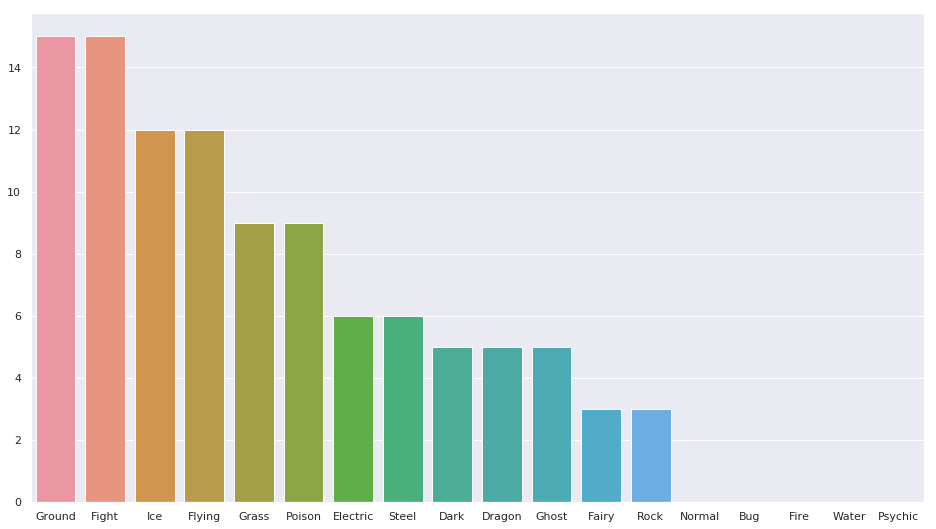

In [8]:
plt.figure(figsize=(16, 9))
sns.barplot(x=counts.index, y=counts.values)

So overall Fight and Ground are the deal breakers. You need both. The runner-ups are Ice and Flying. I was surprised by this because so far I neglected both Fight and Ground in my team builds. Interestingly, both Fire and Water don't show up in the team either (maybe an argument against these starters?), wheres Grass is possible. Last, but not least, Normal, Bug and Psychic can also be neglected.